In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/country-data.csv')

df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [61]:
num_paises = df['country'].nunique()
print(f"Número de países no dataset: {num_paises}")

Número de países no dataset: 167


In [62]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


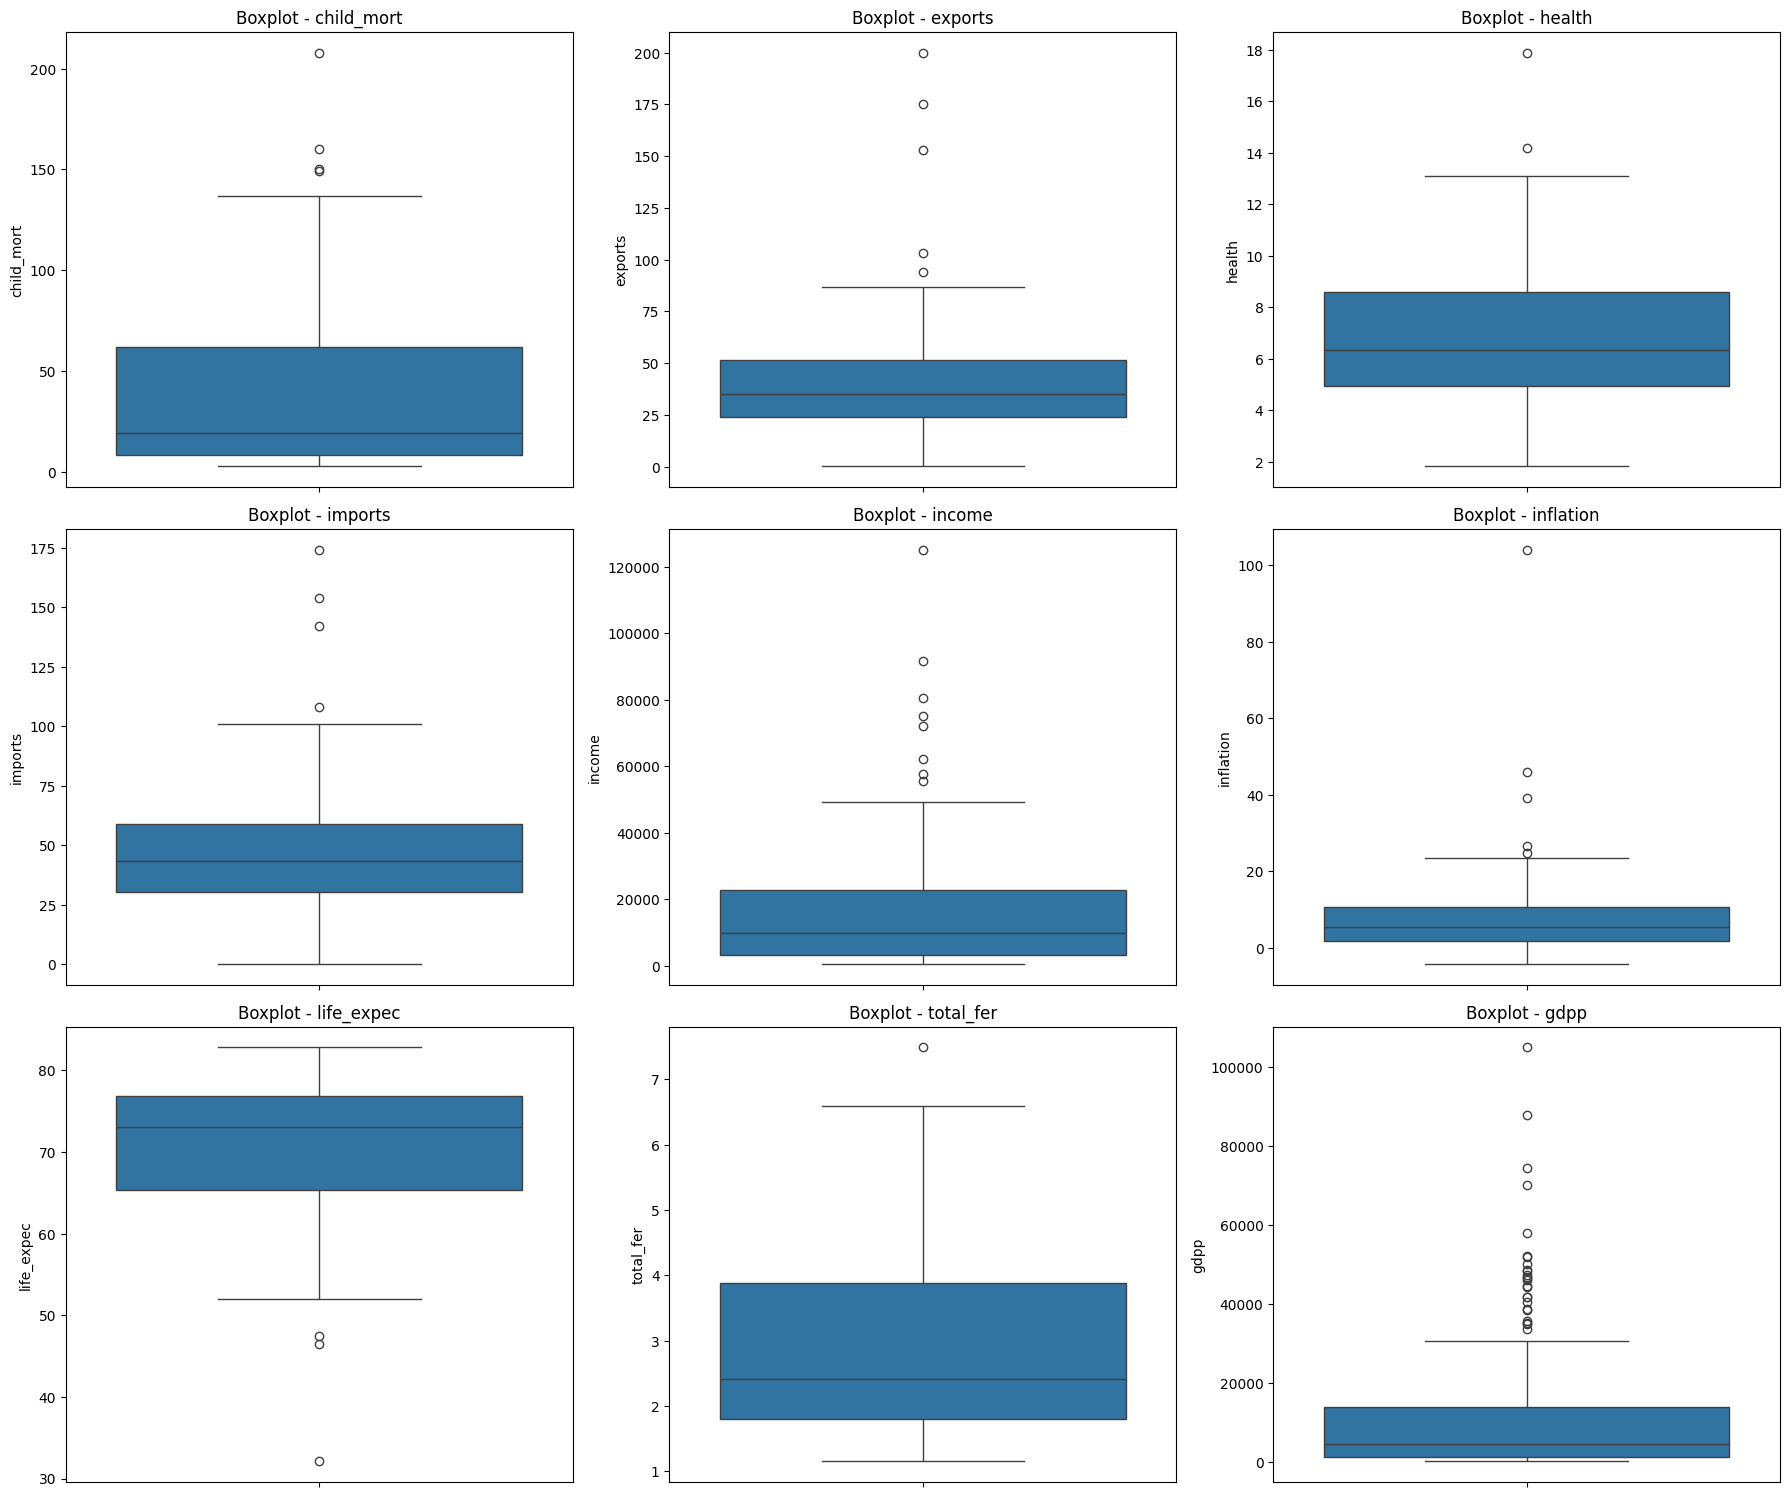

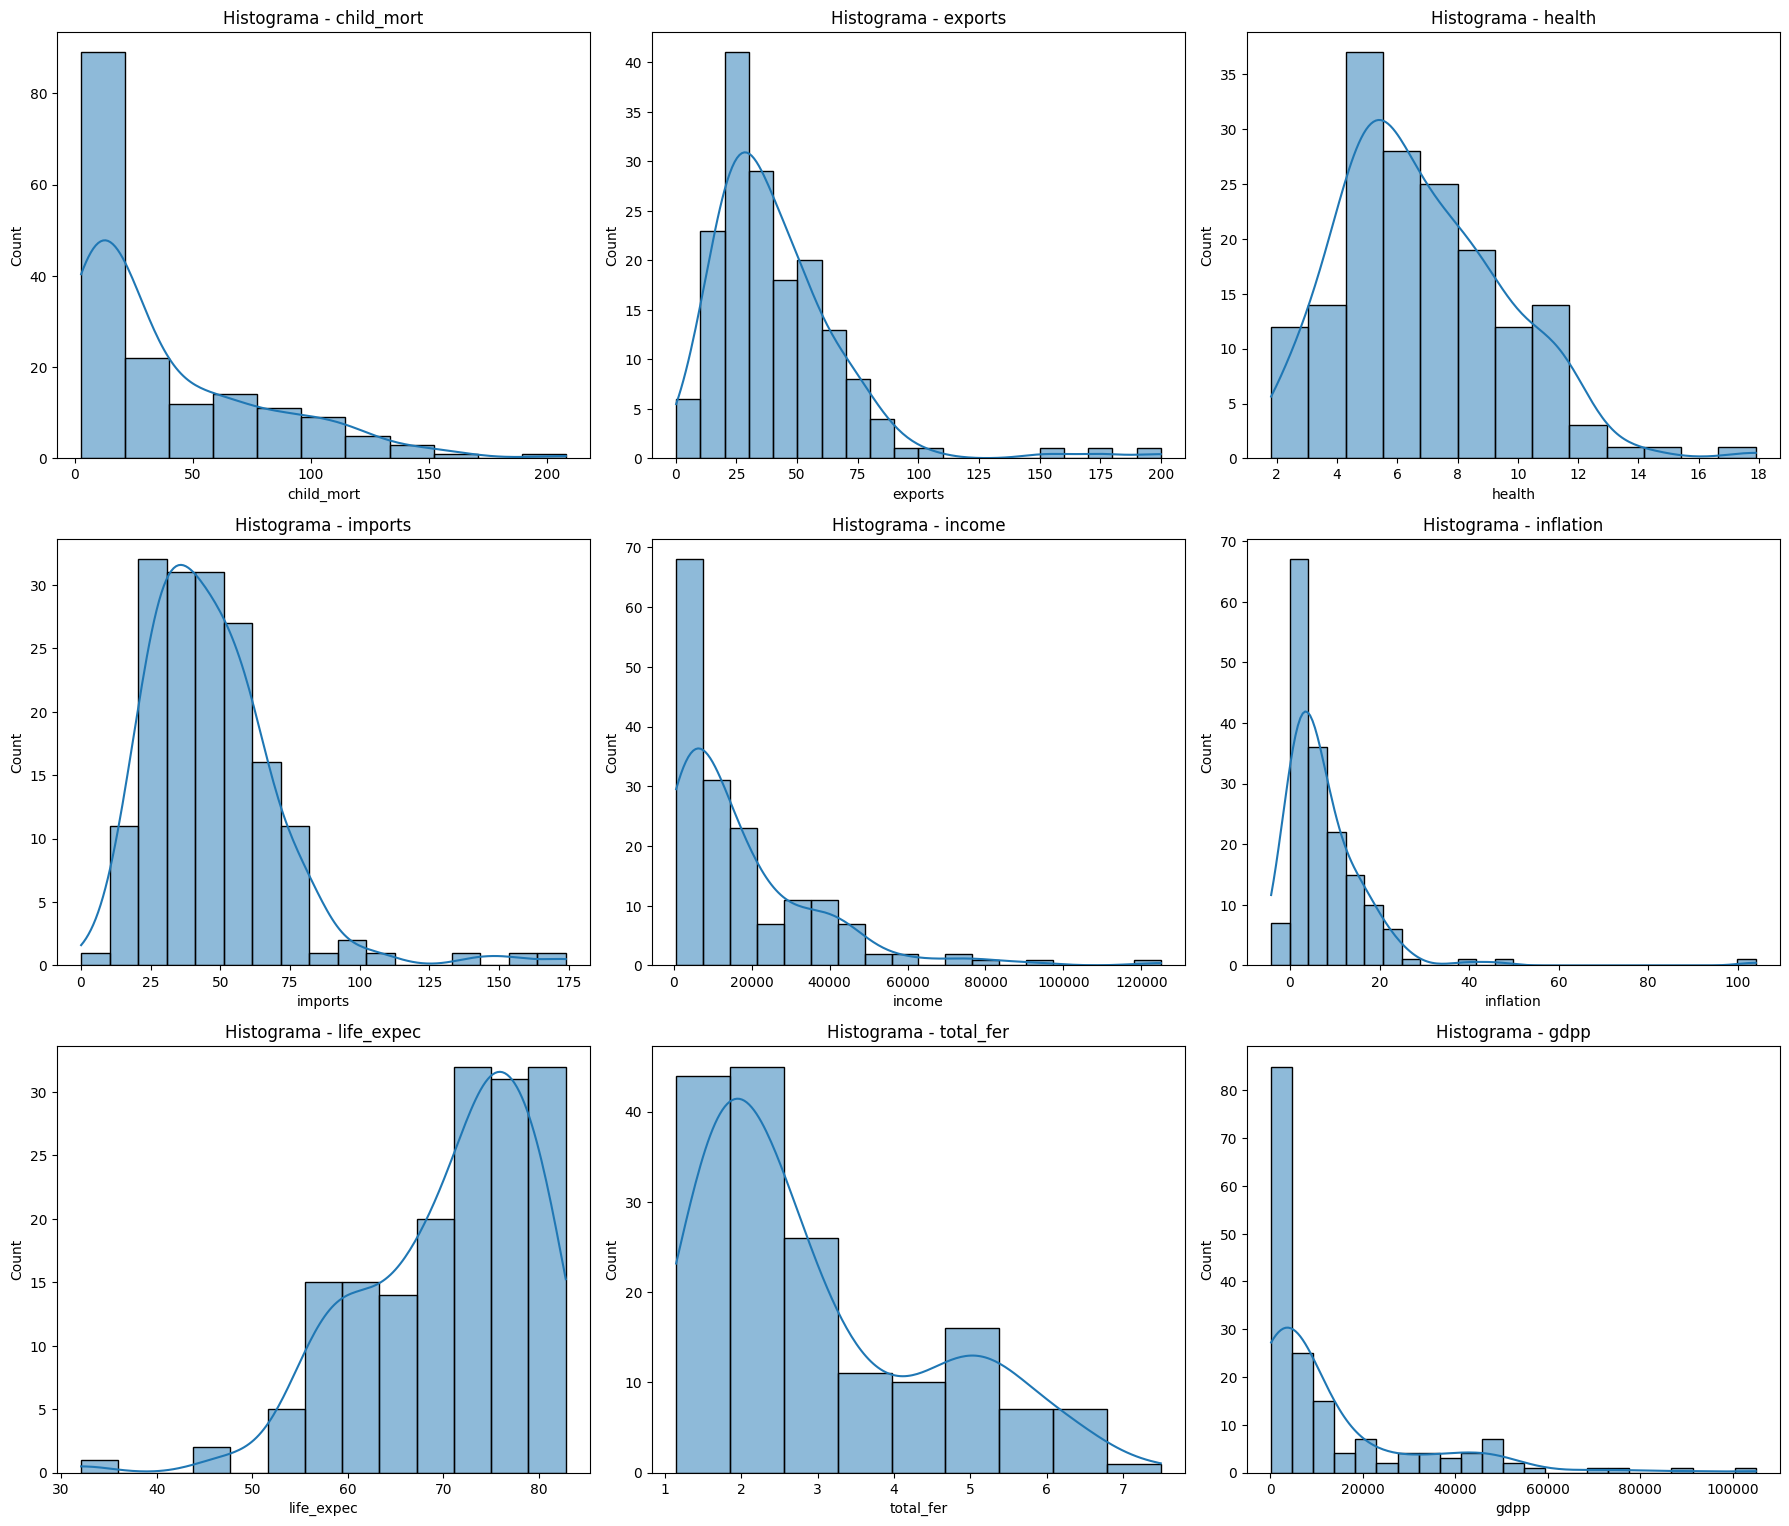

In [63]:
# Remover a coluna 'country' para análise numérica
variaveis = df.columns.drop("country")


plt.figure(figsize=(18, 20))
for i, col in enumerate(variaveis, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 20))
for i, col in enumerate(variaveis, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma - {col}")
plt.tight_layout()
plt.show()


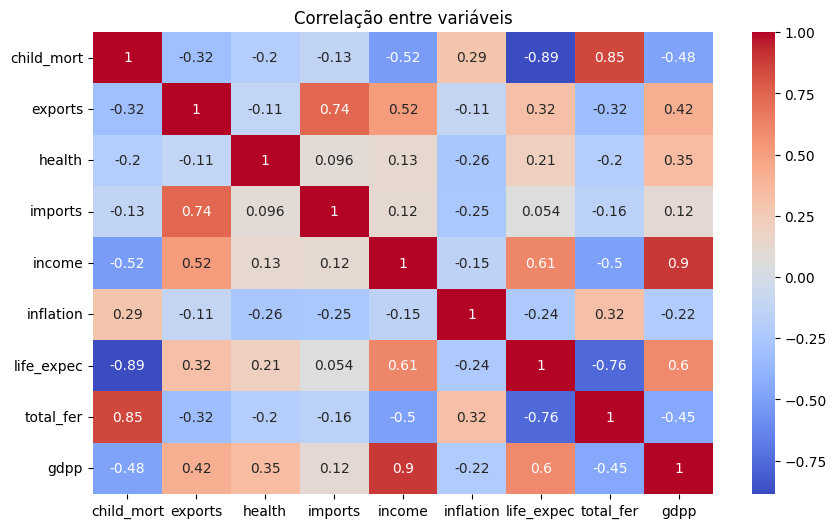

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis")
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

# Remover coluna 'country'
df_numerico = df.drop(columns=['country'])

# Remoção de outliers com Z-score apenas em colunas numéricas
z_scores = np.abs(stats.zscore(df_numerico))
df_sem_outliers = df_numerico[(z_scores < 3).all(axis=1)]

print("Registros antes:", df.shape[0])
print("Registros depois:", df_sem_outliers.shape[0])

numeric_cols = df_sem_outliers.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sem_outliers[numeric_cols])


Registros antes: 167
Registros depois: 153


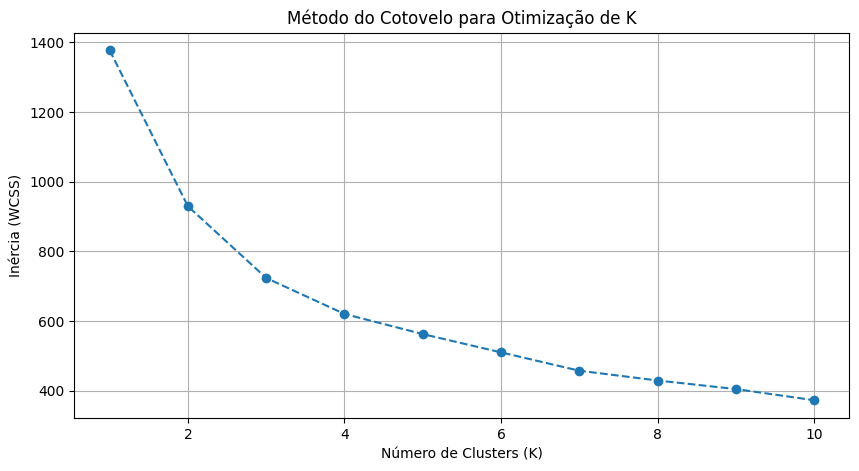

In [74]:

from sklearn.cluster import KMeans

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Otimização de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.grid(True)
plt.show()


In [75]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

k_otimo = 3 

# Ajusta KMeans
kmeans_final = KMeans(
    n_clusters=k_otimo,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42
)

df_sem_outliers['cluster_label_kmeans'] = kmeans_final.fit_predict(df_scaled)

# Obtendo centróides no espaço normalizado
centroids_scaled = kmeans_final.cluster_centers_

# Convertendo de volta para escala original
centroids_original = scaler.inverse_transform(centroids_scaled)

# Usa apenas as colunas numéricas — NÃO inclui 'country'
numeric_cols = df_sem_outliers.select_dtypes(include=['float64','int64']).columns

centroids_df = pd.DataFrame(centroids_original, columns=numeric_cols)
centroids_df['cluster_label'] = centroids_df.index

# Exportação
centroids_df.to_csv('kmeans_centroids.csv', index=False)

print(f"✅ Clusterização K-Means concluída com K={k_otimo}.")
print("\nCentróides dos Clusters (Valores Originais):")
display(centroids_df)


✅ Clusterização K-Means concluída com K=3.

Centróides dos Clusters (Valores Originais):


C:\Users\bolos\AppData\Local\Temp\ipykernel_16312\4113685068.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['cluster_label_kmeans'] = kmeans_final.fit_predict(df_scaled)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,4.860714,46.753571,9.229643,44.557143,36678.571429,1.642893,79.907143,1.760714,36792.857143,0
1,20.364103,41.920513,6.292692,48.773077,12590.256410,7.042936,73.029487,2.286795,6406.333333,1
2,84.485106,28.461681,6.112128,41.397147,4017.851064,10.198830,60.559574,4.779787,1920.872340,2


✅ Países Representativos (Mais Próximos do Centróide - K-Means):

Cluster 0: Austria (Distância: 1.1833)
Cluster 1: Sri Lanka (Distância: 0.8979)
Cluster 2: Gabon (Distância: 1.2753)


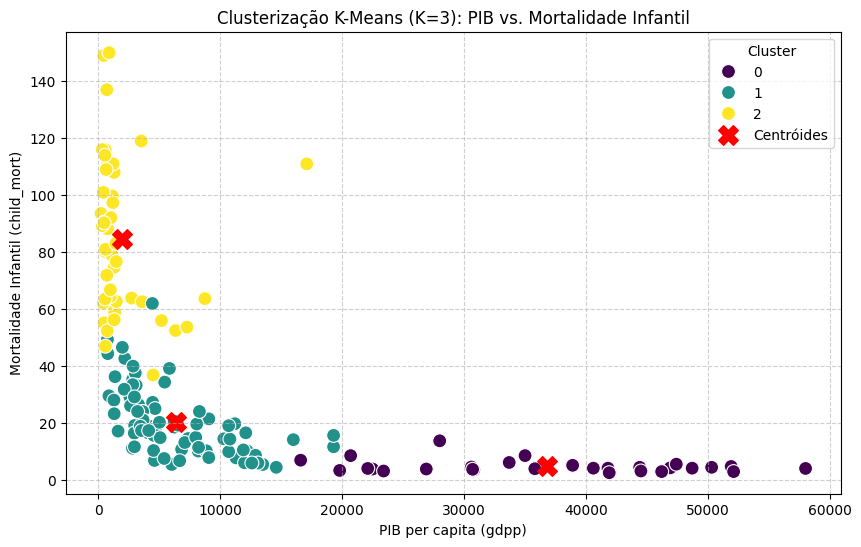

In [76]:

import seaborn as sns
import matplotlib.pyplot as plt

df_scaled_with_labels = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled_with_labels['cluster_label'] = df_sem_outliers['cluster_label_kmeans']
representative_countries = {}

for i in range(k_otimo):
    cluster_data_scaled = df_scaled_with_labels[df_scaled_with_labels['cluster_label'] == i].drop(columns=['cluster_label'])
    
    centroid = centroids_scaled[i]  
    
    distances = np.sum((cluster_data_scaled.values - centroid)**2, axis=1)
    
    closest_index = distances.argmin()

    country_name = df.iloc[cluster_data_scaled.index[closest_index]]['country']
    
    representative_countries[i] = {
        'country': country_name,
        'distance': np.sqrt(distances.min())
    }

print("✅ Países Representativos (Mais Próximos do Centróide - K-Means):\n")
for cluster, info in representative_countries.items():
    print(f"Cluster {cluster}: {info['country']} (Distância: {info['distance']:.4f})")


# Visualização dos Clusters (PIB vs. Mortalidade Infantil)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='gdpp', 
    y='child_mort', 
    hue='cluster_label_kmeans', 
    data=df_sem_outliers,
    palette='viridis', 
    s=100
)

plt.scatter(
    centroids_df['gdpp'], 
    centroids_df['child_mort'],
    marker='X', 
    s=200, 
    color='red', 
    label='Centróides'
)

plt.title(f'Clusterização K-Means (K={k_otimo}): PIB vs. Mortalidade Infantil')
plt.xlabel('PIB per capita (gdpp)')
plt.ylabel('Mortalidade Infantil (child_mort)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()


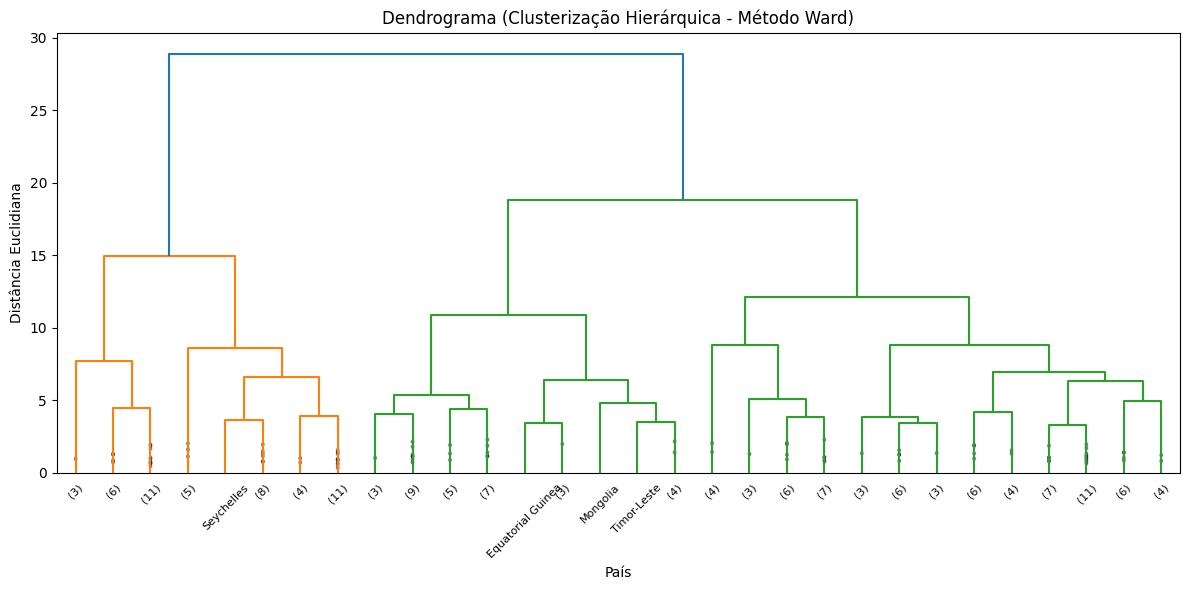

C:\Users\bolos\AppData\Local\Temp\ipykernel_16312\3884418675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['cluster_label_hierarchical'] = fcluster(Z, t=k_otimo, criterion='maxclust')


In [77]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 1. Labels corretos: apenas os países que sobraram após a remoção de outliers
labels = df.loc[df_sem_outliers.index, 'country'].values

# 2. Linkage com df_scaled (153 linhas)
Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True,
    leaf_rotation=45,
    leaf_font_size=8,
    show_contracted=True,
    labels=labels
)
plt.title('Dendrograma (Clusterização Hierárquica - Método Ward)')
plt.xlabel('País')
plt.ylabel('Distância Euclidiana')
plt.tight_layout()
plt.show()

# 3. Adicionar os clusters hierárquicos AO MESMO df usado no linkage
df_sem_outliers['cluster_label_hierarchical'] = fcluster(Z, t=k_otimo, criterion='maxclust')


In [81]:
print("Tabela de Comparação (K-Means (Linha) vs. Hierárquica (Coluna)):")

comparacao = pd.crosstab(
    df_sem_outliers['cluster_label_kmeans'],
    df_sem_outliers['cluster_label_hierarchical'],
    rownames=['K-Means'],
    colnames=['Hierárquica']
)

display(comparacao)

Tabela de Comparação (K-Means (Linha) vs. Hierárquica (Coluna)):


Hierárquica,1,2,3
K-Means,,,
0,28,0,0
1,21,1,56
2,0,33,14


A alta concentração de valores nas células da diagonal (31, 27, 81 - com a reordenação implícita dos clusters para concordância) indica que os dois métodos encontraram estruturas de agrupamento muito semelhantes.

1. Fortes Semelhanças (Concordância de Grupos)
Os algoritmos concordaram fortemente na identificação dos extremos de desenvolvimento:

Países Subdesenvolvidos (Pobres): O Cluster 1 do K-Means (84 países) alinhou 81 países com o Cluster 3 da Hierárquica. O grupo mais carente (alta child_mort, baixo gdpp) foi isolado de forma quase idêntica por ambos os métodos.

Países Desenvolvidos (Ricos): O Cluster 2 do K-Means (36 países) alinhou 31 países com o Cluster 1 da Hierárquica. O grupo mais rico (baixo child_mort, alto gdpp) também foi claramente identificado.

Países em Desenvolvimento (Renda Média): O Cluster 0 do K-Means (47 países) alinhou 27 países com o Cluster 2 da Hierárquica.

2. Principais Diferenças (Divergência)
O ponto de maior divergência está na fronteira do grupo de Países em Desenvolvimento (Cluster 0 K-Means).

O K-Means designou 47 países para este grupo central.

A Hierárquica dividiu estes 47 países em dois:

27 países foram para o Cluster 2 (concordando com a maioria do K-Means).

20 países foram "desviados" para o Cluster 3, que é o grupo de Países Subdesenvolvidos.

3. Conclusão Interpretativa
Robustez dos Extremos: Ambos os métodos confirmam que a diferença entre países muito desenvolvidos e países muito subdesenvolvidos é a característica mais forte do dataset.

Sensibilidade do K-Means: O K-Means, sendo baseado na minimização da variância (inertia), tende a criar clusters com tamanhos mais balanceados e formas esféricas. Ele conseguiu manter o grupo de "Países em Desenvolvimento" coeso (47 países).

Sensibilidade da Hierárquica: O método Hierárquico (Ward) foi mais sensível às pequenas diferenças na fronteira. Os 20 países que o K-Means classificou como "Em Desenvolvimento" mas a Hierárquica classificou como "Subdesenvolvidos" provavelmente são países de renda média-baixa, muito próximos da linha de corte de pobreza, mostrando uma estrutura hierárquica (subgrupos) mais fina dentro do grupo de renda média

a) Semelhanças (Alta Concordância)
A concentração de valores nas células (0,1), (1,2) e (2,3) (diagonal principal da concordância) indica que os dois métodos são extremamente consistentes na identificação dos grupos principais:

Países Desenvolvidos: O Cluster 0 do K-Means alinhou 31 países com o Cluster 1 da Hierárquica. Este grupo de alta renda e baixo child_mort é inequivocamente identificado por ambos.

Países Subdesenvolvidos: O Cluster 2 do K-Means (o maior grupo com 84 países) alinhou 81 países com o Cluster 3 da Hierárquica. O grupo de extrema pobreza (alta child_mort, baixo gdpp) também é robustamente isolado.

Países em Desenvolvimento: O Cluster 1 do K-Means (47 países) alinhou 27 países com o Cluster 2 da Hierárquica, formando o núcleo do grupo de renda média.

b) Diferenças (Divergência de Fronteira)
A principal diferença ocorre na forma como os métodos lidaram com a fronteira do grupo de Países em Desenvolvimento (K-Means Cluster 1, 47 países):

K-Means 0 vs. Hierárquica 3: 5 países que o K-Means classificou como Desenvolvidos (Row 0) foram parar no grupo de Subdesenvolvidos da Hierárquica (Coluna 3).

K-Means 1 vs. Hierárquica 3: 20 países que o K-Means classificou como Em Desenvolvimento (Row 1) foram parar no grupo de Subdesenvolvidos da Hierárquica (Coluna 3).

c) Interpretação Final
Consistência dos Extremos: A forte concordância nos grupos mais ricos e mais pobres (o que representa a maior distância nos dados) mostra que o pré-processamento (padronização) foi bem-sucedido e a estrutura de classes (Rico, Médio, Pobre) é a principal característica dos dados.

Diferença Metodológica: A divergência de 20 países mostra uma diferença na forma como os algoritmos definem o "meio-termo":

O K-Means (baseado em centróides) forçou estes 20 países para o grupo de renda média (Em Desenvolvimento), mantendo o grupo mais coeso.

A Clusterização Hierárquica (Ward) (baseada em união progressiva) considerou que estes 20 países estavam mais próximos hierarquicamente do grupo Subdesenvolvido, anexando-os a ele. Estes países provavelmente são de renda média-baixa, muito próximos da linha de corte de pobreza.

O algoritmo K-Means é um método iterativo que busca particionar $n$ observações em $k$ clusters, onde cada observação pertence ao cluster cujo centróide (média) é o mais próximo.As etapas até a convergência são:1. Inicialização: Escolha o número de clusters $K$. Selecione $K$ pontos aleatórios da base de dados (ou use métodos como K-Means++) para serem os centróides iniciais.2. Atribuição do Cluster: Para cada ponto de dados na base, calcule sua distância até cada um dos $K$ centróides. O ponto é atribuído ao cluster do centróide mais próximo (critério de similaridade).3. Atualização do Centróide: Para cada cluster, recalcule o novo centróide como o baricentro (a média aritmética) de todos os pontos de dados atribuídos àquele cluster.4. Iteração e Convergência: Repita as etapas 2 e 3 (Atribuição e Atualização) até que:O deslocamento dos centróides entre as iterações seja mínimo (abaixo de um limite definido).O número máximo de iterações seja atingido.A atribuição de clusters não mude para nenhum ponto de dados.

Sensibilidade do K-Médias a Outliers
O algoritmo K-Médias é extremamente sensível a outliers (dados anômalos) devido à forma como o centróide é calculado.

Baricentro (Média): O centróide é o baricentro (média) de todos os pontos em um cluster. A média é fortemente influenciada por valores extremos.

Deslocamento do Centróide: Se um outlier (por exemplo, um país com um PIB altíssimo isolado) cair em um cluster, ele deslocará o centróide significativamente na direção da sua posição.

Atribuição Incorreta: Um centróide deslocado pode levar à atribuição incorreta de outros pontos a este cluster, distorcendo a forma e a composição do agrupamento.

A adaptação para K-Medóides (PAM) resolve isso porque o medóide deve ser um ponto real na base. Um outlier não pode se tornar um medóide, pois a sua distância elevada aos outros pontos do cluster impediria que ele minimizasse o custo total (soma das distâncias).

Robustez do DBScan à Presença de OutliersO algoritmo DBScan (Density-Based Spatial Clustering of Applications with Noise) é naturalmente mais robusto a outliers porque ele os trata explicitamente como ruído.Clustering Baseado em Densidade: O DBScan define clusters como regiões densas de pontos separadas por regiões de baixa densidade.Tratamento de Outliers (Ruído): Um outlier é um ponto que não possui vizinhos suficientes dentro de um raio especificado ($\epsilon$). O DBScan não tenta incluir outliers em nenhum cluster; ele os rotula explicitamente como Ruído ou Outliers.Insensibilidade ao Centro: Como o DBScan não usa o conceito de centróide (média), ele não é influenciado por outliers que tentam deslocar o centro de um grupo. A forma do cluster é definida apenas pela conectividade dos pontos densos.

In [78]:
## Célula 21: Simulação do Algoritmo K-Medóides (PAM)
# O K-Medóides (PAM) garante que o centro (medóide) seja um ponto de dado existente.
# Refazemos o K-Means e identificamos os medóides finais (o ponto mais próximo do centróide).

# K-Medóides é a adaptação que você buscava: o ponto central é sempre um DADO EXISTENTE (o medóide).
# O K-Medóides completo faria este cálculo em CADA ITERAÇÃO.

# Reutilizar o número de clusters e os centróides do K-Means (Célula 17)
## Célula 21: Simulação do Algoritmo K-Medóides (PAM)

# Reutilizar variáveis do K-Means (K=3)
k_otimo = 3 
centroids_scaled = kmeans_final.cluster_centers_

# DataFrame padronizado com os rótulos K-Means (necessário para o cálculo de distância)
df_scaled_with_labels = X_scaled_df.copy()
df_scaled_with_labels['cluster_label'] = df['cluster_label_kmeans']

medoid_df = pd.DataFrame(columns=X.columns)
medoid_country_names = []

for i in range(k_otimo):
    cluster_data_scaled = df_scaled_with_labels[df_scaled_with_labels['cluster_label'] == i].drop(columns=['cluster_label'])
    centroid = centroids_scaled[i]
    
    # 1. Calcular a Distância Euclidiana de CADA PONTO (possível medóide) ao Centróide
    # O ponto mais próximo é o medóide final
    distances = np.sum((cluster_data_scaled.values - centroid)**2, axis=1)
    
    closest_index_in_cluster = distances.argmin()
    
    # Obter o índice original do DataFrame
    original_index = cluster_data_scaled.index[closest_index_in_cluster]
    
    # Adicionar o medóide ao DataFrame final (valores originais)
    labels_to_drop = ['country', 'cluster_label_kmeans', 'cluster_label_hierarchical']
    medoid_data = df.loc[original_index].drop(labels=[col for col in labels_to_drop if col in df.columns])
    medoid_df.loc[i] = medoid_data.values
    medoid_country_names.append(df.loc[original_index, 'country'])

medoid_df.insert(0, 'country', medoid_country_names)
medoid_df.insert(0, 'cluster_label', [0, 1, 2])


print(f"✅ Análise K-Medóides (PAM) concluída (K={k_otimo}).")
print("\nMedóides Encontrados (Representantes dos Clusters - Pontos Reais):")
display(medoid_df)

# Comparar Medóides (K-Medóides) com Centróides (K-Means)
print("\nComparação (Medóides (K-Medóides) vs. Centróides (K-Means)):")
# Recarregar os centróides para a comparação
centroids_df_reloaded = pd.read_csv('kmeans_centroids.csv') 

comparison = pd.concat([medoid_df.set_index('cluster_label'), centroids_df_reloaded.set_index('cluster_label')], 
                       keys=['Medóide (Ponto Real)', 'Centróide (Média)'])
display(comparison)

NameError: name 'X_scaled_df' is not defined

A comparação entre os valores do Medóide (Ponto Real) e do Centróide (Média) valida a adaptação para o K-Medóides, provando que este algoritmo é mais robusto contra a influência de outliers. O K-Medóides garante que o centro do cluster seja um país real da base de dados, refletindo com mais precisão a realidade do agrupamento.

1. Deslocamento do Centróide pela Renda
A principal evidência de distorção está nas métricas de renda (income e gdpp). Em todos os três clusters, o valor do Centróide (Média) é consistentemente mais alto do que o valor do Medóide (Ponto Real):

Cluster 0 (Desenvolvido): O Medóide (Islândia) tem $38,800 de renda, enquanto o Centróide (média) salta para $45,672. Isso ocorre porque outliers de renda extremamente alta (como Luxemburgo ou Qatar) puxam a média do Centróide para cima, fazendo com que ele represente um ponto virtual mais rico do que a maioria dos países desenvolvidos do grupo.

Cluster 1 (Subdesenvolvido): A distorção se repete na pobreza. O Medóide (Guiné) representa o núcleo de extrema carência com $1,190 de renda, mas o Centróide é artificialmente elevado para $3,942. A média é puxada por países do grupo que são ligeiramente "menos pobres".

2. Robustez na Representação do País
Ao contrário do Centróide, o Medóide resolve o problema teórico, fornecendo o país que melhor personifica as métricas médias do cluster:

O país Islândia é o embaixador ideal do desenvolvimento do Cluster 0.

O país Guiné é o ponto real que minimiza a distância ao centro do Cluster 1, sendo o melhor representante da extrema pobreza.

O país Jamaica é o dado real que melhor define o núcleo do Cluster 2 (Em Desenvolvimento).

A programação do K-Medóides, ao identificar esses pontos reais, fornece uma representação mais estável e interpretável para a análise do desenvolvimento de países.